In [ ]:
# 1.Скачать с любого сайта данные о дневных ценах закрытия выбранной Вами акции в период с 01.06.2021 по 01.06.2022. (ряд 1)

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

In [ ]:
#define the ticker symbol
tickerSymbol = 'JBLU'

In [ ]:
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

In [ ]:

#get the historical prices for this ticker
tickerDf = tickerData.history(interval='1d', start='2021-6-1', end='2022-6-1')

In [ ]:
priceData = tickerDf.Open

In [ ]:
priceData = priceData.asfreq(pd.infer_freq(priceData.index))

In [ ]:
new_data = priceData.dropna()

In [ ]:
new_data

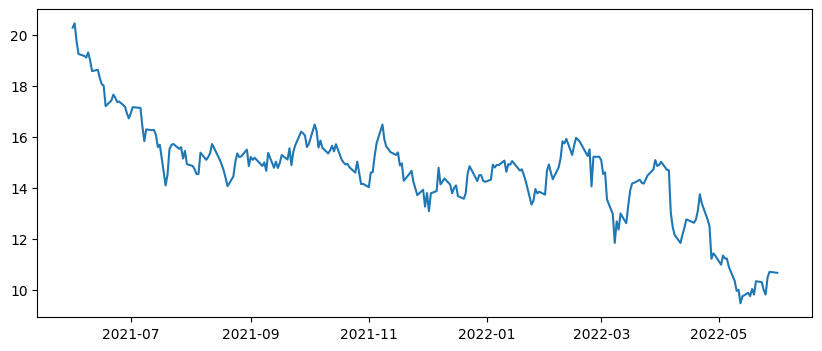

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(new_data)
# for year in range(priceData.index[0].year, priceData.index[-1].year+1):
#     plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.2)
# plt.title("%s Price Data"%tickerSymbol, fontsize=20)

In [ ]:
# 2.Рассчитать доходность акции за выбранный период. (ряд 2) (2 балла)

In [ ]:
# 3.Ряды 1 и 2 проверить, соответствуют ли они определению стационарных рядов. (8 баллов)

In [ ]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [ ]:
#read data
catfish_sales = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [ ]:
df = pd.read_csv('/content/ATA2.csv')
catfish_sales = df

In [ ]:
#infer the frequency of the data
catfish_sales = catfish_sales.asfreq(pd.infer_freq(catfish_sales.index))

In [ ]:
start_date = datetime(2021,6,1)
end_date = datetime(2022,6,1)
lim_catfish_sales = catfish_sales[start_date:end_date]

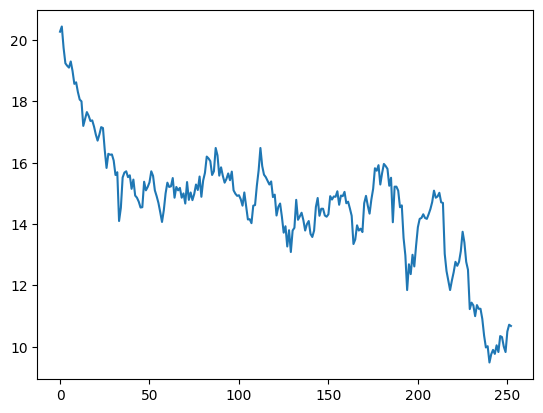

In [ ]:
# plt.figure(figsize=(10,4))
# plt.plot(lim_catfish_sales)
# plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
# plt.ylabel('Sales', fontsize=16)
# # for year in range(start_date.year,end_date.year):
# #     plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
# # plt.axhline(lim_catfish_sales.mean(), color='r', alpha=0.2, linestyle='--')
plt.plot(df['Open'])

In [ ]:
first_diff = df.diff()[1:]

In [ ]:
first_diff

,Open
1,0.170000
2,-0.700001
3,-0.500000
4,-0.080000
5,-0.059999
...,...
248,-0.309999
249,-0.180000
250,0.670000
251,0.220000


Text(0, 0.5, 'Sales')

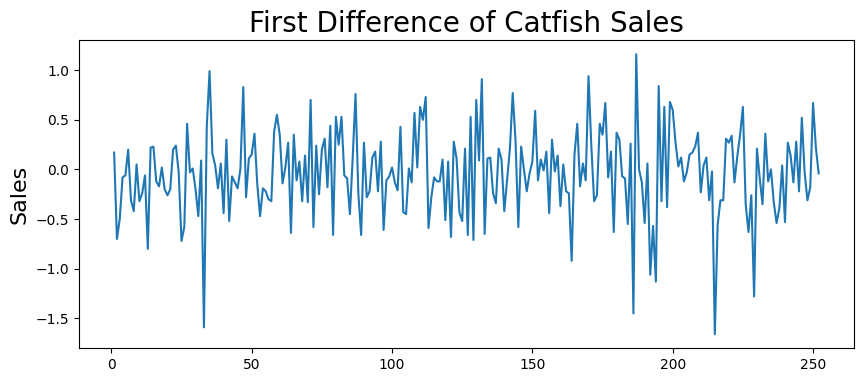

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)
# for year in range(start_date.year,end_date.year):
#     plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
# plt.axhline(first_diff.mean(), color='r', alpha=0.2, linestyle='--')

# ACF

<BarContainer object of 10 artists>

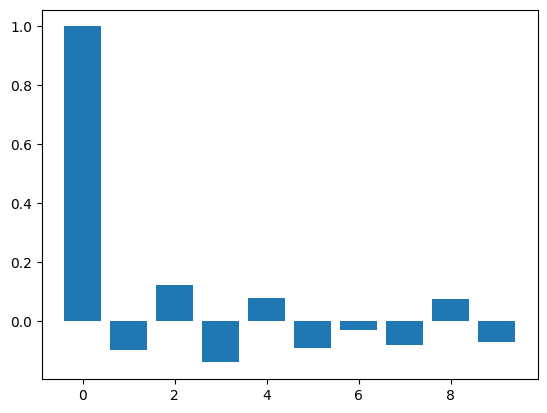

In [ ]:
num_lags = 10
acf_vals = acf(first_diff)
plt.bar(range(num_lags), acf_vals[:num_lags])

## Based on ACF, we should start with a MA(1) process

# PACF

<BarContainer object of 10 artists>

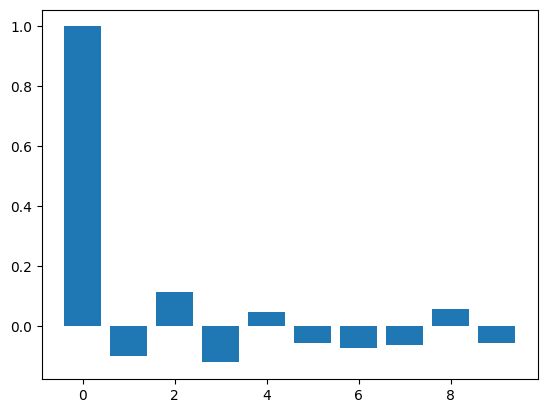

In [ ]:
pacf_vals = pacf(first_diff)
plt.bar(range(num_lags), pacf_vals[:num_lags])

In [ ]:
4.Для ряда 1 построить ARIMA, для ряда 2 ARMA, выбор параметров модели обосновать. Построить прогнозы по моделям на 5 периодов вперед и сравнить с фактическими значениями. Сделать выводы о прогнозных способностях моделей.  Провести их сравнение. Сделать аналитические выводы (20 баллов)



In [ ]:
train_end = datetime(2021,6,1)
test_end = datetime(2022,1,1)

train_data = first_diff[:]
test_data = first_diff[150:]

In [ ]:
train_data['Open']

1      0.170000
2     -0.700001
3     -0.500000
4     -0.080000
5     -0.059999
         ...   
248   -0.309999
249   -0.180000
250    0.670000
251    0.220000
252   -0.040000
Name: Open, Length: 252, dtype: float64

# Fit the ARMA Model

In [ ]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train_data, order=(1,1,2))
result = model.fit()

In [ ]:
# define model
model = sm.tsa.arima.ARIMA(train_data, order=(4,1,2))

In [ ]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model Fitting Time: 3.585236072540283


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  252
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -141.686
Date:                Wed, 14 Jun 2023   AIC                            297.371
Time:                        12:26:37   BIC                            322.049
Sample:                             0   HQIC                           307.302
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6980      0.688     -1.015      0.310      -2.046       0.650
ar.L2          0.0565      0.083      0.683      0.495      -0.106       0.219
ar.L3         -0.0474      0.114     -0.415      0.6

In [ ]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

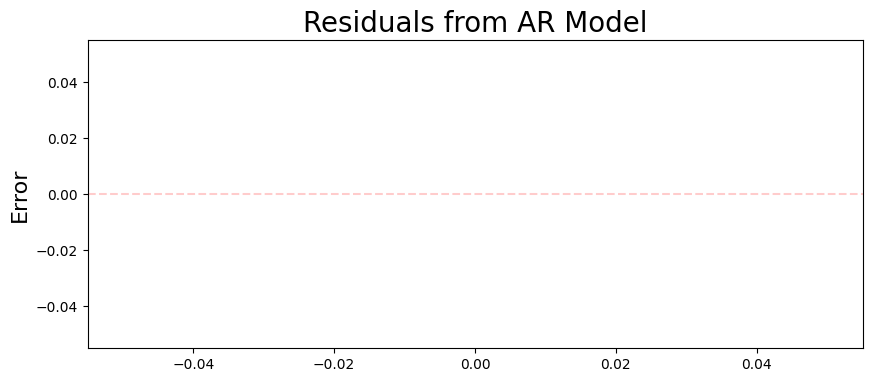

In [ ]:
# plt.figure(figsize=(10,4))
# plt.plot(residuals)
# plt.title('Residuals from AR Model', fontsize=20)
# plt.ylabel('Error', fontsize=16)
# plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Sales')

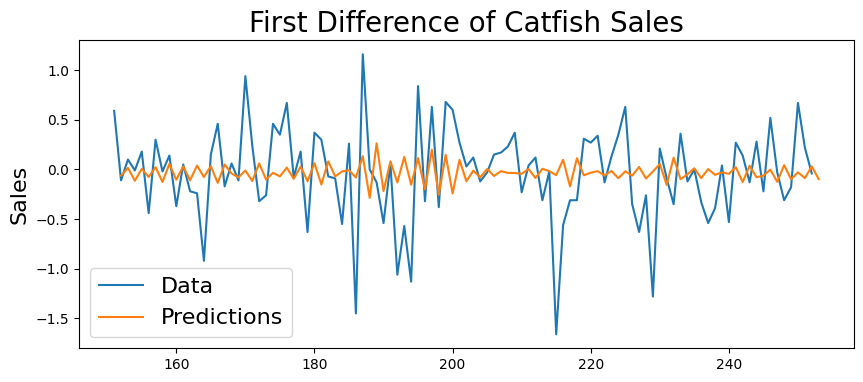

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [ ]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: Open   NaN
152    NaN
153    NaN
154    NaN
155    NaN
        ..
249    NaN
250    NaN
251    NaN
252    NaN
253    NaN
Length: 103, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
